In [1]:
import numpy as np 
import pandas as pd 
import os

In [4]:
import tensorflow as tf
from tensorflow.keras import layers

#version
print(tf.__version__)

#load handwritten numbers dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



2.6.0
11501568/11490434 [==============================] - 1s 0us/step


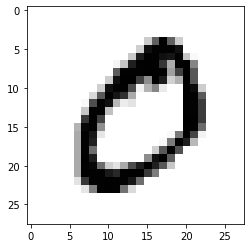

This number is 0
This data is not normalised
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0  

In [13]:
#lets see the handwritten number
import matplotlib.pyplot as plt
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

#Lets see what the number is labelled as
print("This number is " + str(y_train[1]))

#lets see how the number is represented
print("This data is not normalised")
print(x_train[1])

In [34]:
#lets see distribution of the data, we ideally expect the data to have equal number of handwritten pictures for each number
num_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for numlabel in y_train:
    for num in num_dict:
        if numlabel == num:
            num_dict[num] += 1
            break
      
print("The number of pictures for each number is:")
print(num_dict)

for num in num_dict:
    num_dict[num] = round(num_dict[num]/len(y_train), 4)

print("\nThe percentage of pictures for each number is: ")
print(num_dict)

print(" \nThe reason I checked the dataset was to see if it had a similar distribution of pictures for each number because if it had a   distribution like 90 percent of threes and 10 percent of other numbers then our model would be good at predicting threes but   bad at predicting other numbers")

The number of pictures for each number is:
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

The percentage of pictures for each number is: 
{0: 0.0987, 1: 0.1124, 2: 0.0993, 3: 0.1022, 4: 0.0974, 5: 0.0903, 6: 0.0986, 7: 0.1044, 8: 0.0975, 9: 0.0992}
 
The reason I checked the dataset was to see if it had a similar distribution of pictures for each number because if it had a   distribution like 90 percent of threes and 10 percent of other numbers then our model would be good at predicting threes but   bad at predicting other numbers


In [35]:
#normalize the data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

#Create the model
model = tf.keras.Sequential([
                            layers.Flatten(),
                            layers.Dense(128, activation = 'relu'),
                            layers.Dense(128, activation = 'relu'),
                            layers.Dense(10, activation = 'softmax')
])


#Compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#Train the model
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2624 - accuracy: 0.9244
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1093 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0719 - accuracy: 0.9777


In [36]:
#Test the model with data it hasn't seen before, remember we still have xtest and ytest!
val_loss, val_acc = model.evaluate(x_test, y_test)
print("val_loss: "+str(val_loss)+" val_acc: "+ str(val_acc))
#We have an accuracy of 97 percent, thats good!

313/313 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9727
val_loss: 0.09729473292827606 val_acc: 0.9726999998092651


In [37]:
#Save the model so that you don't have to waste time everytime you want to use the model.
model.save('my_first_deep_learning_model')

#load the saved model
new_model = tf.keras.models.load_model('my_first_deep_learning_model')

INFO:tensorflow:Assets written to: my_first_deep_learning_model\assets


In [38]:
#lets use our saved model to predict the value of x_test
predictions = new_model.predict(x_test)
print(predictions)

[[3.61148556e-10 2.22611907e-09 1.74313584e-06 ... 9.99997973e-01
  1.07992948e-09 3.15052406e-09]
 [7.26385055e-12 7.98923196e-04 9.99174654e-01 ... 5.21451604e-10
  1.95581826e-08 4.21218052e-12]
 [1.79900255e-08 9.99742687e-01 1.13759867e-04 ... 3.24904286e-05
  3.33968273e-05 1.84636122e-07]
 ...
 [1.27131528e-09 4.98364216e-07 9.54150181e-08 ... 2.48178349e-05
  1.30564085e-05 2.48207707e-05]
 [6.42371674e-07 6.68754652e-08 5.76460799e-08 ... 1.05618483e-06
  5.48908065e-05 1.57671973e-08]
 [5.69157770e-08 4.02286315e-10 1.11208479e-07 ... 4.47032775e-12
  3.32868133e-08 8.38419167e-10]]


In [46]:
#lets see if our model predicted the correct answer or not
import numpy as np

#This is the first prediction
print("The fist prediction is "+ str(np.argmax(predictions[0])))

The fist prediction is 7


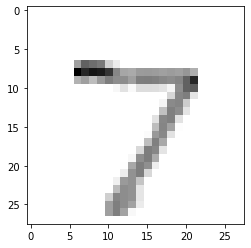

Yes our model's prediction is right


In [47]:
#lets us plot the prediction to see if it is a seven or not 
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()
print("Yes our model's prediction is right")